In [56]:
%pylab inline

import pandas as pd
import scipy.stats

data = pd.read_csv("AgentBindSingletons.tsv", sep="\t")
data = data.sort_values("Ratio_all", ascending=False)

data["Ratio_0.001"] = data["S_0.001"]/data["N_0.001"]

Populating the interactive namespace from numpy and matplotlib


In [94]:
# For each factor, compute: CIs, p-val vs. all

conf_all_low = []
conf_all_high = []
conf_05_low = []
conf_05_high = []
conf_01_low = []
conf_01_high = []
conf_001_low = []
conf_001_high = []

odds_05 = []
odds_01 = []
odds_001 = []
pval_05 = []
pval_01 = []
pval_001 = []

prop_pval_001 = []

z = 1.96 # for 95% CI

for cutoff in [0.05, 0.01, 0.001]:
    conf_low = []
    conf_high = []
    conf_low_all = []
    conf_high_all = []
    odds = []
    pval = []
    prop_pval = []
    for i in range(data.shape[0]):
        n_all = data["N_all"].values[i]
        s_all = data["S_all"].values[i]
        n_target = data["N_%s"%cutoff].values[i]
        s_target = data["S_%s"%cutoff].values[i]
        
        # Confidence intervals
        p_all = s_all*1.0/n_all
        err_all = z*np.sqrt(p_all*(1-p_all)/n_all)
        conf_low_all.append(p_all-err_all)
        conf_high_all.append(p_all+err_all)
        
        p_target = s_target*1.0/n_target
        err_target = z*np.sqrt(p_target*(1-p_target)/n_target)
        conf_low.append(p_target-err_target)
        conf_high.append(p_target+err_target)
       
        # Hypergeomtric p
        t_target = [[s_target, n_target-s_target], \
               [s_all-s_target, n_all-n_target-s_all+s_target]]
        try:
            f = scipy.stats.fisher_exact(t_target)
        except: f = [np.nan]*2
        odds.append(f[0])
        pval.append(f[1])
        
        # Proportion test p
        n_not = n_all-n_target
        s_not = s_all-s_target
        p_not = s_not*1.0/n_not
        se = np.sqrt(p_all*(1-p_all)*(1.0/n_target+1.0/n_not))
        z_target = (p_target-p_not)/se
        prop_pval.append(1-scipy.stats.norm.cdf(z_target))
        
    data["conf_all_low"] = conf_low_all
    data["conf_all_high"] = conf_high_all
    data["conf_%s_low"%cutoff] = conf_low
    data["conf_%s_high"%cutoff] = conf_high
    data["odds_%s"%cutoff] = odds
    data["pval_%s"%cutoff] = pval
    data["prop_%s"%cutoff] = prop_pval

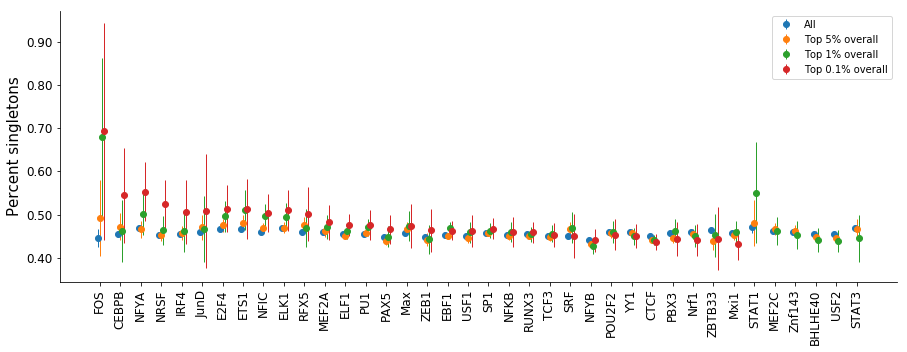

In [113]:
data = data.sort_values("odds_0.001", ascending=False)
xvals = np.array(range(data.shape[0]))
w = 0.1

fig = plt.figure()
fig.set_size_inches((15, 5))
ax = fig.add_subplot(111)

ax.errorbar(xvals, data["Ratio_all"], label="All", yerr=data["conf_all_high"]-data["Ratio_all"], marker="o", linewidth=0, elinewidth=1)
ax.errorbar(xvals+w, data["Ratio_0.05"], label="Top 5% overall", yerr=data["conf_0.05_high"]-data["Ratio_0.05"], marker="o", linewidth=0, elinewidth=1)
ax.errorbar(xvals+2*w, data["Ratio_0.01"], label="Top 1% overall", yerr=data["conf_0.01_high"]-data["Ratio_0.01"], marker="o", linewidth=0, elinewidth=1)
ax.errorbar(xvals+3*w, data["Ratio_0.001"], label="Top 0.1% overall", yerr=data["conf_0.001_high"]-data["Ratio_0.001"], marker="o", linewidth=0, elinewidth=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks(xvals+w)
ax.set_xticklabels(data["TF"], rotation=90, size=12);
ax.set_yticklabels(["%0.2f"%item for item in ax.get_yticks()], size=12)
ax.legend(loc="upper right")
ax.set_ylabel("Percent singletons", size=15);
fig.savefig("AgentBindSingletons.pdf")

In [121]:
data[data["prop_0.05"]<0.05]#.sort_values("prop_0.001")[["TF","Ratio_all","Ratio_0.001","odds_0.001","prop_0.001","prop_0.01"]]

,TF,datasize,N_all,S_all,Ratio_all,N_0.05,S_0.05,Ratio_0.05,N_0.01,S_0.01,...,conf_0.001_high,odds_0.05,pval_0.05,odds_0.01,pval_0.01,odds_0.001,pval_0.001,prop_0.001,prop_0.05,prop_0.01
26,SRF,3515,65471,29549,0.45133,3659,1704,0.465701,750,352,...,0.502057,1.063244,0.07267,1.076077,0.319374,1.000088,1.0,0.499664,0.036096,0.159495


In [114]:
!pwd

/home/mgymrek/workspace/agent-bind-analyses/singletons


In [122]:
data[data["TF"]=="STAT1"]

,TF,datasize,N_all,S_all,Ratio_all,N_0.05,S_0.05,Ratio_0.05,N_0.01,S_0.01,...,conf_0.001_high,odds_0.05,pval_0.05,odds_0.01,pval_0.01,odds_0.001,pval_0.001,prop_0.001,prop_0.05,prop_0.01
36,STAT1,219,6007,2829,0.470951,337,162,0.480712,69,38,...,NaN,1.04234,0.736234,1.382162,0.184756,NaN,NaN,NaN,0.35587,0.090899
